### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('brazil.csv')

In [3]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,119017.2,3371.9,115652.0,120149.9,61690.5,226717.0,N.A.
1,02JAN2020_00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08:00 - 08:30,116451.5,806.2,115652.0,116574.7,115649.0,61.0,N.A.
3,08:30 - 09:00,116451.5,528.1,116546.4,116979.6,116515.3,60.0,N.A.
4,09:00 - 09:30,116451.5,103.6,116957.1,117108.5,116956.2,60.0,N.A.
5,09:30 - 10:00,116451.5,730.2,117209.2,117813.4,117139.7,60.0,N.A.
6,10:00 - 10:30,116451.5,-243.5,117795.4,117846.3,117465.0,60.0,N.A.
7,10:30 - 11:00,116451.5,156.7,117561.0,117735.4,117535.5,60.0,N.A.
8,11:00 - 11:30,116451.5,-16.1,117739.4,117837.1,117710.5,60.0,N.A.
9,11:30 - 12:00,116451.5,-61.0,117658.2,117661.6,117562.8,60.0,N.A.


In [4]:
df=df.dropna()

In [5]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,119017.2,3371.9,115652.0,120149.9,61690.5,226717.0,N.A.
2,08:00 - 08:30,116451.5,806.2,115652.0,116574.7,115649.0,61.0,N.A.
3,08:30 - 09:00,116451.5,528.1,116546.4,116979.6,116515.3,60.0,N.A.
4,09:00 - 09:30,116451.5,103.6,116957.1,117108.5,116956.2,60.0,N.A.
5,09:30 - 10:00,116451.5,730.2,117209.2,117813.4,117139.7,60.0,N.A.
6,10:00 - 10:30,116451.5,-243.5,117795.4,117846.3,117465.0,60.0,N.A.
7,10:30 - 11:00,116451.5,156.7,117561.0,117735.4,117535.5,60.0,N.A.
8,11:00 - 11:30,116451.5,-16.1,117739.4,117837.1,117710.5,60.0,N.A.
9,11:30 - 12:00,116451.5,-61.0,117658.2,117661.6,117562.8,60.0,N.A.
10,12:00 - 12:30,116451.5,36.2,117690.3,117776.8,117641.8,60.0,N.A.


In [6]:
# df.index=[i for i in range(len(df))] or df.reset_index(inplace=True) to make indices in 1,2,3 order
df.head(10)
# print(df.loc[0])

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,119017.2,3371.9,115652.0,120149.9,61690.5,226717.0,N.A.
2,08:00 - 08:30,116451.5,806.2,115652.0,116574.7,115649.0,61.0,N.A.
3,08:30 - 09:00,116451.5,528.1,116546.4,116979.6,116515.3,60.0,N.A.
4,09:00 - 09:30,116451.5,103.6,116957.1,117108.5,116956.2,60.0,N.A.
5,09:30 - 10:00,116451.5,730.2,117209.2,117813.4,117139.7,60.0,N.A.
6,10:00 - 10:30,116451.5,-243.5,117795.4,117846.3,117465.0,60.0,N.A.
7,10:30 - 11:00,116451.5,156.7,117561.0,117735.4,117535.5,60.0,N.A.
8,11:00 - 11:30,116451.5,-16.1,117739.4,117837.1,117710.5,60.0,N.A.
9,11:30 - 12:00,116451.5,-61.0,117658.2,117661.6,117562.8,60.0,N.A.
10,12:00 - 12:30,116451.5,36.2,117690.3,117776.8,117641.8,60.0,N.A.


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0       119017.2
1       116451.5
2       116451.5
3       116451.5
4       116451.5
          ...   
3894    119270.6
3895    119250.4
3896    119280.7
3897    119225.2
3898    119017.2
Name: Close, Length: 3899, dtype: float64

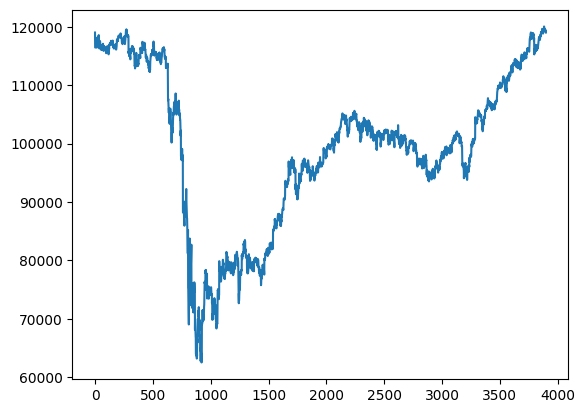

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

0       119017.2
1       116451.5
2       116451.5
3       116451.5
4       116451.5
          ...   
3894    119270.6
3895    119250.4
3896    119280.7
3897    119225.2
3898    119017.2
Name: Close, Length: 3899, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.98202923]
 [0.93744635]
 [0.93744635]
 ...
 [0.98660793]
 [0.98564354]
 [0.98202923]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(2534, 1365)

In [17]:
train_data

array([[0.98202923],
       [0.93744635],
       [0.93744635],
       ...,
       [0.68287894],
       [0.68419086],
       [0.66234166]])

In [18]:
test_data

array([[0.66437123],
       [0.66346592],
       [0.65879859],
       ...,
       [0.98660793],
       [0.98564354],
       [0.98202923]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(2433, 100)
(2433,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(1264, 100)
(1264,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
print(X_train.shape)

(2433, 100, 1)


In [25]:
# pip install tensorflow

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 [==============================] - 21s 316ms/step - loss: 0.0531 - val_loss: 0.0023
Epoch 2/100
39/39 [==============================] - 10s 252ms/step - loss: 0.0022 - val_loss: 3.0005e-04
Epoch 3/100
39/39 [==============================] - 10s 257ms/step - loss: 0.0013 - val_loss: 3.0539e-04
Epoch 4/100
39/39 [==============================] - 10s 268ms/step - loss: 0.0013 - val_loss: 2.9055e-04
Epoch 5/100
39/39 [==============================] - 10s 248ms/step - loss: 0.0012 - val_loss: 2.9671e-04
Epoch 6/100
39/39 [==============================] - 12s 314ms/step - loss: 0.0012 - val_loss: 2.6887e-04
Epoch 7/100
39/39 [==============================] - 12s 319ms/step - loss: 0.0012 - val_loss: 2.9961e-04
Epoch 8/100
39/39 [==============================] - 11s 280ms/step - loss: 0.0011 - val_loss: 3.3617e-04
Epoch 9/100
39/39 [==============================] - 12s 317ms/step - loss: 0.0011 - val_loss: 2.5364e-04
Epoch 10/100
39/39 [==============================

39/39 [==============================] - 16s 401ms/step - loss: 3.3970e-04 - val_loss: 1.0932e-04
Epoch 76/100
39/39 [==============================] - 15s 390ms/step - loss: 3.4104e-04 - val_loss: 8.7517e-05
Epoch 77/100
39/39 [==============================] - 14s 366ms/step - loss: 3.2775e-04 - val_loss: 1.1786e-04
Epoch 78/100
39/39 [==============================] - 14s 356ms/step - loss: 3.7962e-04 - val_loss: 0.0011
Epoch 79/100
39/39 [==============================] - 13s 324ms/step - loss: 4.5059e-04 - val_loss: 8.6765e-05
Epoch 80/100
39/39 [==============================] - 12s 309ms/step - loss: 3.2735e-04 - val_loss: 7.3991e-05
Epoch 81/100
39/39 [==============================] - 12s 312ms/step - loss: 3.0630e-04 - val_loss: 7.1636e-05
Epoch 82/100
39/39 [==============================] - 12s 305ms/step - loss: 3.1240e-04 - val_loss: 7.2559e-05
Epoch 83/100
39/39 [==============================] - 12s 305ms/step - loss: 3.2545e-04 - val_loss: 6.5264e-05
Epoch 84/100
39/39

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.12.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

40/40 [==============================] - 2s 58ms/step


In [33]:
train_predict.shape

(2433, 1)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

96990.14659257795

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

105013.50879562984

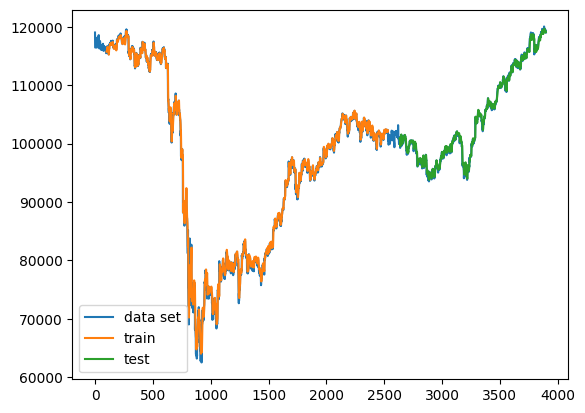

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data set','train','test'])
plt.show()

In [38]:
len(test_data)

1365

In [39]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.9293419520756225,
 0.9299779318493806,
 0.9219082868512054,
 0.9268762272150688,
 0.9237623590331718,
 0.9327251559540566,
 0.9302993970355697,
 0.9324627708561402,
 0.9416132339397734,
 0.944808771655459,
 0.9452171193244017,
 0.9444595040747885,
 0.9302907087872943,
 0.9262506733392415,
 0.9265182713861233,
 0.9409998436115312,
 0.9410259083563572,
 0.9354932318545937,
 0.936249109454552,
 0.9433091800031279,
 0.9387443743592419,
 0.9336791256146937,
 0.9298840987680064,
 0.9356079167318285,
 0.9362508471042068,
 0.9353490069332222,
 0.9344558550105126,
 0.9384263844723628,
 0.9388347321413055,
 0.935163078420129,
 0.9386175259344209,
 0.9406557889798257,
 0.9485933726042155,
 0.9517228796330086,
 0.9540947714121881,
 0.9580792020712783,
 0.9569775321899601,
 0.9649429182088307,
 0.9669481659107892,
 0.9683365479851951,
 0.9661888130115208,
 0.9672244522059461,
 0.9626526959634398,
 0.9620914351248502,
 0.9653790682722552,
 0.9608872439138822,
 0.9609046204104328,
 0.9619628490503

In [42]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9810008]
101
1 day input [0.92997793 0.92190829 0.92687623 0.92376236 0.93272516 0.9302994
 0.93246277 0.94161323 0.94480877 0.94521712 0.9444595  0.93029071
 0.92625067 0.92651827 0.94099984 0.94102591 0.93549323 0.93624911
 0.94330918 0.93874437 0.93367913 0.9298841  0.93560792 0.93625085
 0.93534901 0.93445586 0.93842638 0.93883473 0.93516308 0.93861753
 0.94065579 0.94859337 0.95172288 0.95409477 0.9580792  0.95697753
 0.96494292 0.96694817 0.96833655 0.96618881 0.96722445 0.9626527
 0.96209144 0.96537907 0.96088724 0.96090462 0.96196285 0.96099845
 0.97300561 0.97481277 0.97453822 0.96981529 0.97246347 0.97135658
 0.9770109  0.98203444 0.98240282 0.9803524  0.98214565 0.98402231
 0.98243062 0.9832925  0.98234027 0.98311352 0.98387982 0.99305635
 0.99209717 0.98630211 0.98011434 0.98247059 0.98495195 0.98420998
 0.98469652 0.97893969 0.98161567 0.98615267 0.99045683 0.98697632
 0.98871049 0.99154112 0.98881127 0.98883908 1.         0.9955047
 0.99411979 0.99384524 0.99338824 0.9

8 day output [[0.9674982]]
9 day input [0.94480877 0.94521712 0.9444595  0.93029071 0.92625067 0.92651827
 0.94099984 0.94102591 0.93549323 0.93624911 0.94330918 0.93874437
 0.93367913 0.9298841  0.93560792 0.93625085 0.93534901 0.93445586
 0.93842638 0.93883473 0.93516308 0.93861753 0.94065579 0.94859337
 0.95172288 0.95409477 0.9580792  0.95697753 0.96494292 0.96694817
 0.96833655 0.96618881 0.96722445 0.9626527  0.96209144 0.96537907
 0.96088724 0.96090462 0.96196285 0.96099845 0.97300561 0.97481277
 0.97453822 0.96981529 0.97246347 0.97135658 0.9770109  0.98203444
 0.98240282 0.9803524  0.98214565 0.98402231 0.98243062 0.9832925
 0.98234027 0.98311352 0.98387982 0.99305635 0.99209717 0.98630211
 0.98011434 0.98247059 0.98495195 0.98420998 0.98469652 0.97893969
 0.98161567 0.98615267 0.99045683 0.98697632 0.98871049 0.99154112
 0.98881127 0.98883908 1.         0.9955047  0.99411979 0.99384524
 0.99338824 0.99121444 0.98552712 0.98699369 0.98575301 0.99062017
 0.98913969 0.99014579 0

16 day output [[0.9580029]]
17 day input [0.93549323 0.93624911 0.94330918 0.93874437 0.93367913 0.9298841
 0.93560792 0.93625085 0.93534901 0.93445586 0.93842638 0.93883473
 0.93516308 0.93861753 0.94065579 0.94859337 0.95172288 0.95409477
 0.9580792  0.95697753 0.96494292 0.96694817 0.96833655 0.96618881
 0.96722445 0.9626527  0.96209144 0.96537907 0.96088724 0.96090462
 0.96196285 0.96099845 0.97300561 0.97481277 0.97453822 0.96981529
 0.97246347 0.97135658 0.9770109  0.98203444 0.98240282 0.9803524
 0.98214565 0.98402231 0.98243062 0.9832925  0.98234027 0.98311352
 0.98387982 0.99305635 0.99209717 0.98630211 0.98011434 0.98247059
 0.98495195 0.98420998 0.98469652 0.97893969 0.98161567 0.98615267
 0.99045683 0.98697632 0.98871049 0.99154112 0.98881127 0.98883908
 1.         0.9955047  0.99411979 0.99384524 0.99338824 0.99121444
 0.98552712 0.98699369 0.98575301 0.99062017 0.98913969 0.99014579
 0.98643243 0.98608143 0.98660793 0.98564354 0.98202923 0.98100078
 0.97890902 0.9770354  

24 day output [[0.9497496]]
25 day input [0.93534901 0.93445586 0.93842638 0.93883473 0.93516308 0.93861753
 0.94065579 0.94859337 0.95172288 0.95409477 0.9580792  0.95697753
 0.96494292 0.96694817 0.96833655 0.96618881 0.96722445 0.9626527
 0.96209144 0.96537907 0.96088724 0.96090462 0.96196285 0.96099845
 0.97300561 0.97481277 0.97453822 0.96981529 0.97246347 0.97135658
 0.9770109  0.98203444 0.98240282 0.9803524  0.98214565 0.98402231
 0.98243062 0.9832925  0.98234027 0.98311352 0.98387982 0.99305635
 0.99209717 0.98630211 0.98011434 0.98247059 0.98495195 0.98420998
 0.98469652 0.97893969 0.98161567 0.98615267 0.99045683 0.98697632
 0.98871049 0.99154112 0.98881127 0.98883908 1.         0.9955047
 0.99411979 0.99384524 0.99338824 0.99121444 0.98552712 0.98699369
 0.98575301 0.99062017 0.98913969 0.99014579 0.98643243 0.98608143
 0.98660793 0.98564354 0.98202923 0.98100078 0.97890902 0.9770354
 0.97525686 0.97354156 0.9719066  0.97035855 0.96889186 0.96749818
 0.96616846 0.96489358 0

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

3899

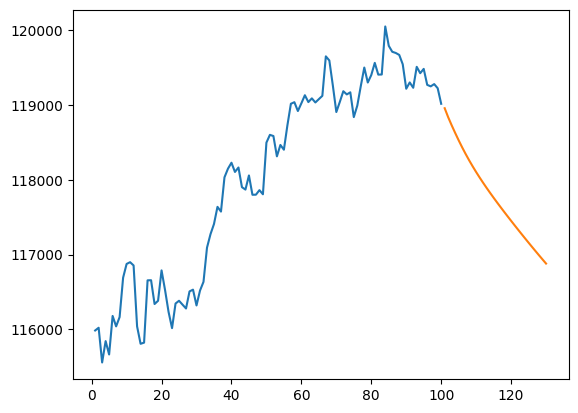

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

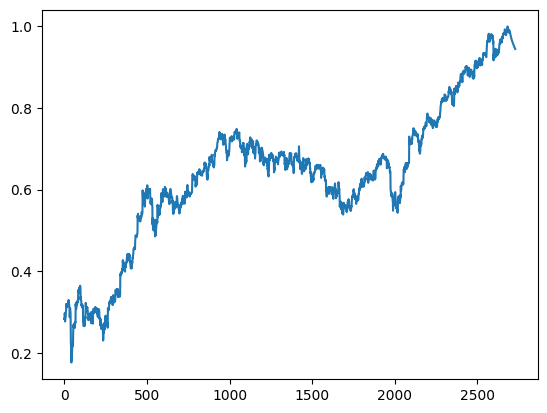

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

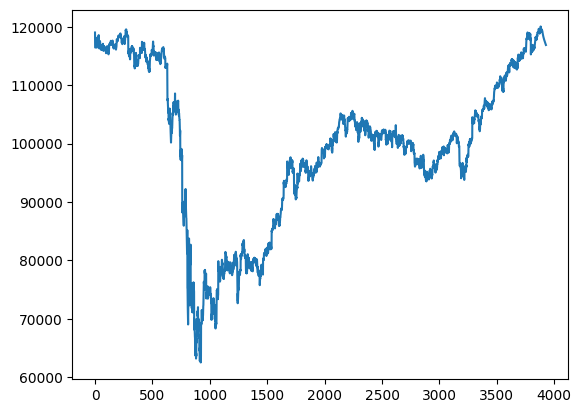

In [49]:
plt.plot(df3)